In [ ]:
# Imports and settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

pd.set_option('display.max_columns', None)

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## Data Import

In [ ]:
# Read data

reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/256_data/RAW_interactions.csv')
recipes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/256_data/RAW_recipes.csv')

In [ ]:
recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [ ]:
reviews.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


## Exploratory Data Analysis

In [ ]:
# Combine recipes and reviews into one df
food = reviews.merge(recipes, left_on = 'recipe_id', right_on = 'id')

In [ ]:
reviews.shape, recipes.shape

((1132367, 5), (231637, 12))

In [ ]:
# Check for nulls
print(reviews.isna().sum()), print(recipes.isna().sum())

user_id        0
recipe_id      0
date           0
rating         0
review       169
dtype: int64
name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64


(None, None)

In [ ]:
food.shape

(1132367, 17)

In [ ]:
food.head()

,user_id,recipe_id,date,rating,review,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,40893,495,1533,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...","[204.8, 5.0, 9.0, 26.0, 24.0, 2.0, 10.0]",4,"['combine beans , onion , chilies , 1 / 2 teas...",easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'dice...",9
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",white bean green chile pepper soup,40893,495,1533,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...","[204.8, 5.0, 9.0, 26.0, 24.0, 2.0, 10.0]",4,"['combine beans , onion , chilies , 1 / 2 teas...",easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'dice...",9
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,devilicious cookie cake delights,44394,20,56824,2002-10-27,"['30-minutes-or-less', 'time-to-make', 'course...","[132.3, 11.0, 39.0, 5.0, 4.0, 11.0, 5.0]",5,"['blend together cake mix , oil and eggs', 'ad...",NaN,"[""devil's food cake mix"", 'vegetable oil', 'eg...",4
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,baked potato toppings,85009,10,64342,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...","[2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]",3,['pick whichever topping you want to use and c...,these toppings sure makes a nice change from p...,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref...",13
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",baked potato toppings,85009,10,64342,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...","[2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]",3,['pick whichever topping you want to use and c...,these toppings sure makes a nice change from p...,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref...",13


In [ ]:
# Convert types of date column

food['review_year'] = pd.to_datetime(food['date']).dt.year
food['submission_year'] = pd.to_datetime(food['submitted']).dt.year

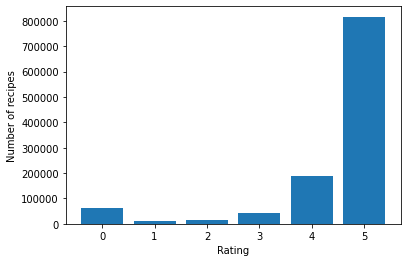

In [ ]:
# Get count of recipes for each rating value. 0 implies no rating was given for that recipe

df_g_by_rating = food.groupby(['rating'])['recipe_id'].count()
plt.bar(df_g_by_rating.index, df_g_by_rating.values)
plt.xlabel('Rating')
plt.ylabel('Number of recipes')
plt.show()

Most of the recipes are highly rated. The dsitribution of number of recipes per rating is not uniform.

In [ ]:
# Check how many recipes have reviews only from the author of the recipe

df_g_by_recipeid = food.groupby(['recipe_id']).agg({'user_id' : 'nunique', 'contributor_id' : 'nunique'}).reset_index()
df_ = df_g_by_recipeid[df_g_by_recipeid.user_id == 1]
idx_review_by_author = list(df_[df_.user_id == df_.contributor_id].index)
print(len(df_), len(idx_review_by_author))

91953 91953


All recipes that have one review is written by the recipe contributor.

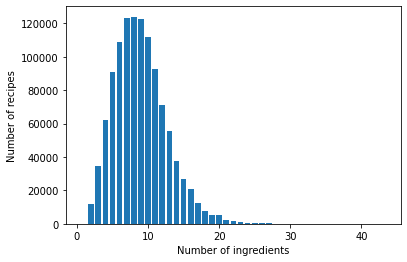

In [ ]:
# Distribution of number of ingredients

df_g_by_ingredients = food.groupby(['n_ingredients'])['recipe_id'].count()
plt.bar(df_g_by_ingredients.index, df_g_by_ingredients.values)
plt.xlabel('Number of ingredients')
plt.ylabel('Number of recipes')
plt.show()

In [ ]:
# Converting string column of nutrition values into separate float values columns

food[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']] = food.nutrition.str.split(',', expand = True) 
food['calories'] = food['calories'].apply(lambda x: x.replace('[' ,''))
food['carbohydrates'] = food['carbohydrates'].apply(lambda x: x.replace(']' ,''))
food[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']] =  food[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']].astype(float)

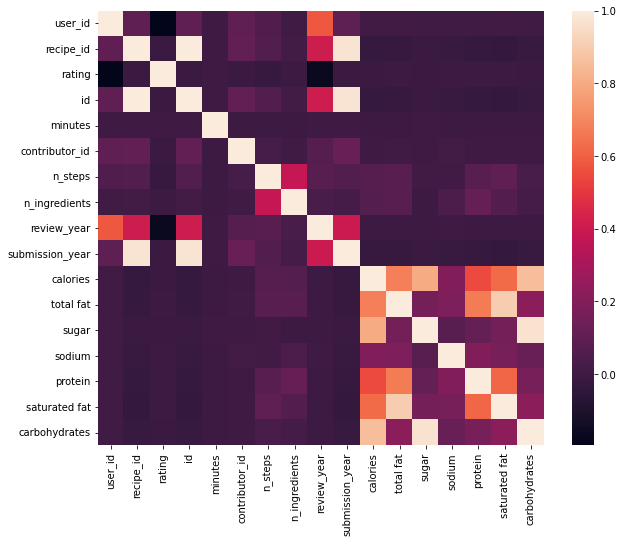

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(food.corr()) 

Calories has a very strong relationship with the other nutritional variables, and most of the strongest relationships are between the nutritional variables. It makes sense that number of ingredients has a strong positive relationship with number of steps. The one negative relationship is rating and review year, which means that reviews have become slightly more negative over time.

In [ ]:
food[['minutes', 'n_steps', 'n_ingredients', 'calories', 'total fat', 'sugar', 'sodium', 'protein', 'saturated fat', 'carbohydrates']].describe()

,minutes,n_steps,n_ingredients,calories,total fat,sugar,sodium,protein,saturated fat,carbohydrates
count,1.132367e+06,1.132367e+06,1.132367e+06,1.132367e+06,1.132367e+06,1.132367e+06,1.132367e+06,1.132367e+06,1.132367e+06,1.132367e+06
mean,3.614684e+04,9.627970e+00,8.952028e+00,4.601758e+02,3.464284e+01,7.860298e+01,3.196699e+01,3.576065e+01,4.414266e+01,1.492760e+01
std,8.796494e+06,5.819689e+00,3.689908e+00,1.029886e+03,7.325345e+01,6.352805e+02,1.205648e+02,7.449373e+01,9.483816e+01,6.570128e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+01,6.000000e+00,6.000000e+00,1.764000e+02,9.000000e+00,9.000000e+00,6.000000e+00,7.000000e+00,7.000000e+00,4.000000e+00
50%,4.000000e+01,8.000000e+00,9.000000e+00,3.127000e+02,2.000000e+01,2.400000e+01,1.600000e+01,1.800000e+01,2.300000e+01,9.000000e+00
75%,7.000000e+01,1.200000e+01,1.100000e+01,5.127000e+02,4.000000e+01,6.700000e+01,3.500000e+01,5.300000e+01,5.200000e+01,1.600000e+01
max,2.147484e+09,1.450000e+02,4.300000e+01,4.343602e+05,1.718300e+04,3.627290e+05,2.933800e+04,6.552000e+03,1.039500e+04,3.609800e+04


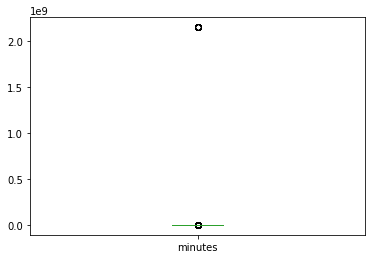

In [ ]:
# Looking at outliers in various columns
food['minutes'].plot(kind = 'box')

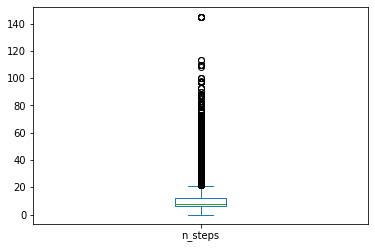

In [ ]:
food['n_steps'].plot(kind = 'box')

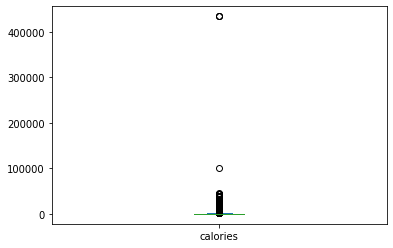

In [ ]:
food['calories'].plot(kind = 'box')

The above three features have outliers as denoted by the points lying above Q3+(1.5*IQR)

0.01935646217985148


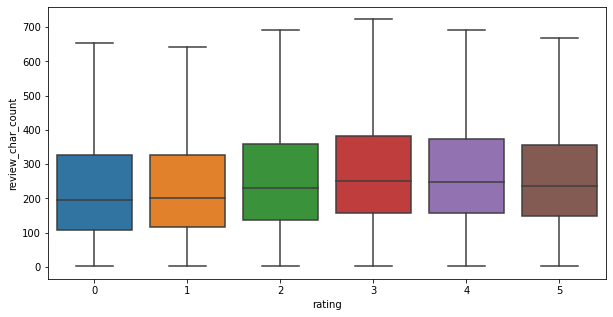

In [ ]:
# Correlation between length of review and rating

food['review_char_count'] = food['review'].astype('str').apply(len)
plt.figure(figsize = (10, 5))
sns.boxplot(data = food, x = 'rating', y = 'review_char_count', showfliers = False)  
print(food['review_char_count'].corr(food.rating) )

1. median character count went up for reviews with rating between 1-3
2. very low correlation between length of review and rating

In [ ]:
# Correlation between number of tags and rating, and tags and len of review

food['n_tags'] = food.tags.str.split(',').apply(len)
print(food['n_tags'].corr(food.rating)) 
print(food['n_tags'].corr(food.review_char_count))

0.006959391453354484
-0.015078194860842015


1. very low correlation between number of tags and rating
2. negative correlation between len(review) and n_tags. assumpltion that tags are auto-generated from reviews is false

0.14520762443620985


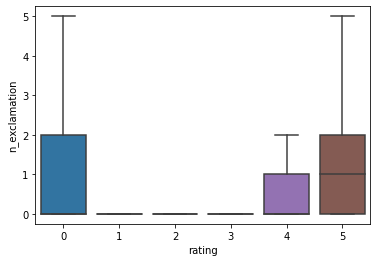

In [ ]:
food['n_exclamation'] = food.review.str.count('!')
sns.boxplot(data = food, x = 'rating', y = 'n_exclamation', showfliers = False)
print(food['n_exclamation'].corr(food['rating']))

People who use more exclamations tend to give higher rating

In [ ]:
# Correlation between number of uppercase characters and rating

food['n_capital'] = food.review.str.count(r'(\b[A-Z]{2,}\b)')
print(food['n_capital'].corr(food['rating']))

0.029336775075011323


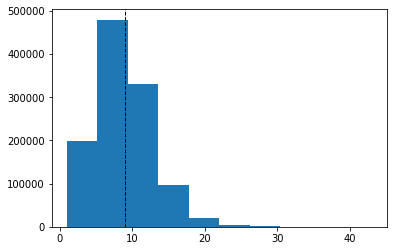

In [ ]:
# Median number of ingredients

plt.hist(data = food, x = 'n_ingredients')
plt.axvline(food['n_ingredients'].median(), color='k', linestyle = 'dashed', linewidth = 1)

Median number of ingredients is 9